# Implementacja problemu budowania labiryntow.

Inspirowane:

https://ii.uni.wroc.pl/~wzychla/maze.html#:~:text=Taki%20uk%C5%82ad%20b%C4%99d%C4%99%20nazywa%C5%82%20zaczynem,szybki%2C%20dzia%C5%82a%20w%20czasie%20liniowym.

Do reprezentacji labiryntu wykorzystamy graf.

Wierzcholki sa sa kwadratami siatki, a krawedzie sa przejsciami
miedzy sasiednimi kwadratami. Musimy jednak uscislic cechy
naszego grafu aby uzyskac ladny efekt zarowno wizualnie jak
i do rozwiazywania.

Po lekturze powyzszego artykulu i obserwacji efektow widocznych w takich labiryntach mozemy zanotowac:

*   Musi byc sciezka od wejscia do wyjscia
*   Nie moze byc zbyt wiele takich sciezek
*   Graf powinien byc raczej Singly Connected - istnieje
tylko jedna sciezka dla kazdej pary wierzcholkow.
Zeby nie generowac obszarow niemozliwych do odwiedzenia.
*   Sciezka powinna miec wiele zakretow, labirynt bedzie
zbyt prosty jak pominiemy ten punkt

Mozna zauwazyc ze zwykle drzewo ma wiekszosc tych wlasnosci poza ostatnia.
Wiec mozna wygenerowac drzewo pokrywajace kazdy kwadrat (cos jak MST).
Nie otrzymamy wtedy komorek do ktorych sie nie da dojsc.
I dodac do tego wiele zakretow w sciezkach.

Mozna stworzyc Algorytm Modyfikujac najprostsze algorytmy Grafowe,
takie jak BFS, DFS czy chociazby Kruskal (ktory zwraca MST).
(BFS oraz DFS poprzez kolejne wywolania tworza drzewa, ktore czasami
sa jednakowe, ale istotne jest to ze te zwracane drzewa mozna wykorzystac
jako szkielet do labiryntu.)

Szkic Rozwiazania:

*   Zacznijmy z siatka bez krawedzi (kazdy kwadrat jest otoczony przez
sciany na wszystkich stronach)
*   Dodaj krawedzie (usuwajac sciany ) dla wejscia lewej gory oraz
wyjscia z labiryntu z prawego dolu
*   Umiesc korzen drzewa w jakims kwadracie.

*   powtarzaj az drzewo pokryje wszystkie kwadraty - jakbysmy tworzyli MST:
  * Wybierz dowolny wierzcholek ktory jest w drzewie
  * Losowo wybierz sasiada ktory nie zostal jeszcze dodany do drzewa
  * Dodaj krawedz (usuwamy sciane) z wezla do sasiada

   
Pokazujac na przykladzie, korzen, A zostal umieszczony w
lewym-dolnym rogu. Wybrano dwie etykiety: A-B-C-D oraz a-b-c-d, 
losowo, (nie do konca losowo, zaczynaja one tworzyc labirynt jak w opisie).





In [3]:

Labirynt="""
 +  +--+--+--+--+--+--+--+--+--+
 | A  b  c|  |  |  |  |  |  |  |
 +  +--+  +--+--+--+--+--+--+--+
 | B|  | d|  |  |  |  |  |  |  |
 +  +--+--+--+--+--+--+--+--+--+
 | C  D|  |  |  |  |  |  |  |  |
 +--+--+--+--+--+--+--+--+--+--+
 |  |  |  |  |  |  |  |  |  |  |
 +--+--+--+--+--+--+--+--+--+--+
 |  |  |  |  |  |  |  |  |  |  |
 +--+--+--+--+--+--+--+--+--+  +
"""






Nastepnie wybieram wezel d i rozszerzam go do e (w tym punkcie nie ma
dostepnych sasiadow, dlatego e nie bedzie wybrane w przyszlosci),
Oraz wybieram D i rozszerzam stad po calej drodze do N, w kazdym kroku
wybierajac wezel ktory wlasnie dodalem:

In [4]:
 
 Labirynt="""
 +  +--+--+--+--+--+--+--+--+--+
 | A  b  c|  |  |  |  |  |  |  |
 +  +--+  +--+--+--+--+--+--+--+
 | B| e  d|  | N|  |  |  |  |  |
 +  +--+--+--+  +--+--+--+--+--+
 | C  D|  |  | M|  |  |  |  |  |
 +--+  +--+--+  +--+--+--+--+--+
 | F  E|  |K  L |  |  |  |  |  |
 +  +--+--+  +--+--+--+--+--+--+
 | G  H  I  J|  |  |  |  |  |  |
 +--+--+--+--+--+--+--+--+--+  +
 """
 
 
 
 
 



Kontynujemy w taki sposob az kazdy kazdy kwadrat w siatce zostanie dodany do drzewa. W tym punkcie bedzie sciezka od startu do celu. Niektore sciany zostana,
inne zostana zburzone.









---







# Drzewa Losowe
Implementacja

- Drzewo Reprezentowane jako zbior krawedzi
- Krawedz `Edge` to tupla dwoch wierzcholkow
- Krawedzie sa skierowane w obie strony, wiec
aby uniknac pomylek, bedziemy uzywac tupli ktora jest posortowana:
zawsze `(A, B)`, nigdy `(B, A)`. Konstruktor `edge` okresla to.
- Wezlem w drzewie moze byc cokolwiek: liczba, litera,
W naszej implementacji bedziemy tworzyc drzewa gdzie wezly to
kwadraty w macierzy, ale funkcja `random_tree` akceptuje
wezly kazdej postaci.
- Algorytm dla `random_tree(nodes, neighbors, pop)` pracuje
nastepujaco:
  * Argumenty to:
    - `nodes`: kolekcja wezlow
    - `neighbors`: funkcja taka ze `neighbors(node)` zwraca zbior
    wezlow
    - `pop`: Funkcja taka ze `pop(frontier)` usuwa i zwraca element z `frontier`.
  * Funkcja sledzi trzy kolekcje:
    - `tree`: Zbior krawedzi tworzacych drzewo
    - `nodes`: Zbior wezlow ktore jeszcze nie zostaly dodane do drzewa
    ale beda
    - `frontier`: kolejka wezlow w drzewie ktore sa wybieralne
    do dodania krawedzi
  * W kazdej Iteracji:
    - Uzyj `pop` aby pobrac `node` z frontier, i znajdz neighbors ktore
    nie sa jeszcze w drzewie
    - Jesli sa sasiedzi, losowo wybierz (`nbr`), dodaj `edge(node, nbr)` do `tree`, usun
      sasiadow z `nodes`, zatrzymaj wezel oraz sasiada w frontier.
      Jesli nie ma sasiadow usun wezel z frontier.
      
  * Jezeli `nodes` zostanie, zwroc `tree`.

In [6]:
# Pomocne Zrodlo
# https://towardsdatascience.com/a-python-module-for-maze-search-algorithms-64e7d1297c96
# W Definicjach funkcji uzyjemy annotacji -> do okreslania zwracanego typu.

import random
from collections import deque, namedtuple

#Definicja Typow
Edge = tuple
Tree = set

def edge(A, B) -> Edge: 
  return Edge(sorted([A, B]))

def random_tree(nodes, neighbors, pop=deque.pop) -> Tree:
    """ Powtarzaj: zdejmujemy wezel z podwojnej kolejki i dodajemy krawedz (wezel, sasiad) az wypelnimy drzewo """
    tree = Tree()
    nodes = set(nodes)
    root = nodes.pop()
    frontier = deque([root])
    while nodes:
        node = pop(frontier)
        nbrs = neighbors(node) & nodes
        if nbrs:
            nbr = random.choice(list(nbrs))
            tree.add(edge(node, nbr))
            nodes.remove(nbr)
            frontier.extend([node, nbr])
    return tree

# Tworzenie Losowych Labiryntow

Uzyjmy `random_tree` do implementacji `random_maze`.  
Bazowo, tworzymy kolekcje `(x, y)` kwadratow, przekazujemy je do `random_tree`, i pozwalamy temu zrobic robote.

*  `Maze` to nazwana tupla z trzema polami,  `width` oraz `height`  naszej planszy, oraz zbior  `edges` miedzy kwadratami.
* Kwadrat(komorka) jest oznaczony `(x, y)` tupla calkowitych zmiennych.
* Funkcja `sasiedzi(square)` zwraca cztery otaczajace kwadraty.

In [15]:
Labirynt = namedtuple('Maze', 'width, height, edges')

# Kwadrat macierzy labiryntu - badamy jego sasiadow z czterech stron
Kwadrat = tuple

def sasiedzi(square) -> {Kwadrat}:
    """ Sasiedzi 'kwadratu' labiryntu o wspolrzednych (x,y) czyli lewo, dol, gora, prawo """
    (x, y) = square
    return {(x + 1, y), (x - 1, y), (x, y + 1), (x, y - 1)}

def kwadraty(width, height) -> {Kwadrat}: 
    """Wszystkie kwadraty (wezly) macierzy tych wymiarow """
    return {(x, y) for x in range(width) for y in range(height)}

def losowy_labirynt(width, height, pop=deque.pop) -> Labirynt:
    """Generuj losowy labirynt, uzywajac drzewa losowego"""
    tree = random_tree(kwadraty(width, height), sasiedzi, pop)
    return Labirynt(width, height, tree)


losowy_labirynt(20, 20)

Maze(width=20, height=20, edges={((19, 12), (19, 13)), ((11, 4), (12, 4)), ((12, 15), (13, 15)), ((13, 5), (14, 5)), ((13, 9), (14, 9)), ((16, 12), (17, 12)), ((12, 8), (13, 8)), ((0, 6), (0, 7)), ((5, 7), (5, 8)), ((4, 10), (5, 10)), ((9, 18), (10, 18)), ((9, 15), (10, 15)), ((17, 3), (17, 4)), ((3, 14), (3, 15)), ((13, 3), (13, 4)), ((10, 3), (10, 4)), ((5, 2), (5, 3)), ((17, 8), (18, 8)), ((11, 2), (12, 2)), ((10, 9), (10, 10)), ((15, 0), (15, 1)), ((16, 0), (16, 1)), ((4, 7), (5, 7)), ((10, 11), (10, 12)), ((11, 15), (11, 16)), ((1, 0), (2, 0)), ((7, 11), (7, 12)), ((8, 5), (9, 5)), ((1, 2), (2, 2)), ((16, 19), (17, 19)), ((8, 12), (9, 12)), ((3, 10), (4, 10)), ((5, 5), (5, 6)), ((8, 6), (9, 6)), ((9, 13), (10, 13)), ((16, 5), (17, 5)), ((8, 18), (9, 18)), ((1, 9), (1, 10)), ((18, 17), (19, 17)), ((14, 10), (14, 11)), ((0, 11), (0, 12)), ((4, 4), (5, 4)), ((5, 12), (5, 13)), ((10, 7), (11, 7)), ((10, 1), (11, 1)), ((13, 15), (14, 15)), ((14, 15), (14, 16)), ((1, 7), (1, 8)), ((0, 1

# Wizualizacja Labiryntu

Uzyjemy `matplotlib` do narysowania scian labiryntu.
Spojrzymy w przyszlosc kiedy bedziemy miec wynikowa sciezke
i pozwolimy zeby byla wypisana.

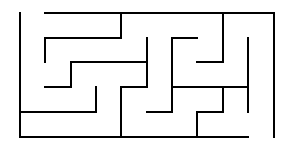

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

def draw_maze(maze, figsize=None, path=None):
    """Wypisz labirynt przez rysowanie linii miedzy sasiednimi kwadratami, poza parami w maze.edges"""
    w, h  = maze.width, maze.height
    plt.figure(figsize=figsize or (w/5, h/5))
    plt.axis('off')
    plt.gca().invert_yaxis()
    exits = {edge((0, 0), (0, -1)), edge((w-1, h-1), (w-1, h))}
    edges = maze.edges | exits
    for sq in kwadraty(w, h):
        for nbr in sasiedzi(sq):
            if edge(sq, nbr) not in edges:
                plot_wall(sq, nbr)
    if path: 
             # Wypisz Rozwiazanie (albo jakakolwiek sciezke) jako czerwona linie przez labirynt
        X, Y = transpose((x + 0.5, y + 0.5) for (x, y) in path)
        plt.plot(X, Y, 'r-', linewidth=2)
        
# Transponowanie Macierzy
def transpose(matrix): 
  return list(zip(*matrix))

def plot_wall(squareA, squareB):
    """ Narysuj Sciane: czarna linie miedzy kwadratami A oraz B """
    (x1, y1), (x2, y2) = squareA, squareB
    if x1 == x2: # pozioma sciana
        y = max(y1, y2)
        X, Y = [x1, x1+1], [y, y]
    else:        # pionowa sciana
        x = max(x1, x2)
        X, Y = [x, x], [y1, y1+1]
    plt.plot(X, Y, 'k-', linewidth=2)


M = losowy_labirynt(10, 5)
draw_maze(M, figsize=(5, 2.5)) 


# Zapisanie Labiryntu do pliku png oraz pdf
plt.savefig('labirynt.png')
#plt.savefig('labirynt.pdf')




# Znajdowanie Sciezki W Labiryncie

Uzyjemy BFS'a ktory gwarantuje ze wynik bedzie
najkrotszy mozliwy. (Ale dla labiryntow z tylko jednym rozwiazaniem
gwarancja nie ma znaczenia)

`BFS` okresla `frontier` nieodwiedzonych kwadratow, i w kazdej iteracji usuwa kwadrat z frontier ktory jest sciezka o najmniejszej glebokosci, dodaje do frontier wszystkich sasiadow tego kwadratu ktorzy nie sa zablokowani przez
sciany i nie zostali wczesniej odwiedzeni.
Slownik  `{square: [square,...]}` nazwany `paths`
ma dwa cele: zapobiega nas od tworzenia petli w sciezce,
i na koncu mowi nam sciezke od startu do celu.
Przykladowo:

 `[(0, 0), (0, 1), (1, 1), (2, 1), ...]`.

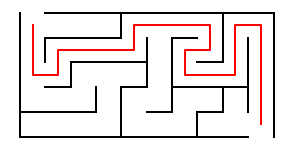

In [17]:
def BFS(maze):
    """ Najkrotszy ciag stanow od poczatku do konca """
    start = (0, 0)
    goal = (maze.width - 1, maze.height - 1)
    frontier = deque([start])  # Kolejka stanow do rozwazenia (dwustronna)
    paths = {start: [start]}   # start ma jedno-kwadratowa sciezke
    while frontier:
        s = frontier.popleft()
        if s == goal:
            return paths[s]
        for s2 in sasiedzi(s):
            if s2 not in paths and edge(s, s2) in maze.edges:
                frontier.append(s2)
                paths[s2] = paths.get(s, []) + [s2]


solution = BFS(M)
solution


draw_maze(M, figsize=(5, 2.5), path=solution)


# Strategie dla 'pop' parametru dla `random maze`
Teraz chce porownac jak labirynt zmienia
sie w zaleznosci od trzech wyborow
dla parametru `pop`

# `pop=deque.pop`

Standardowa metoda pop, `deque.pop`, oznacza ze drzewo jest tworzone **depth-first**; zawsze wybieramy `node` na koncu **end** z `frontier`, 
wiec drzewo podaza za pojedyncza galezia losowo zakreconej sciezki dopoki
sciezka podwoi sie z powrotem i nie ma wiecej sasiadow. 
W tym punkcie wybieramy najbardziej ostatni kwadrat dla ktorego sa sasiedzi
i kontynuujemy stad. 
Labirynt z `deque.pop` wyglada lepiej.


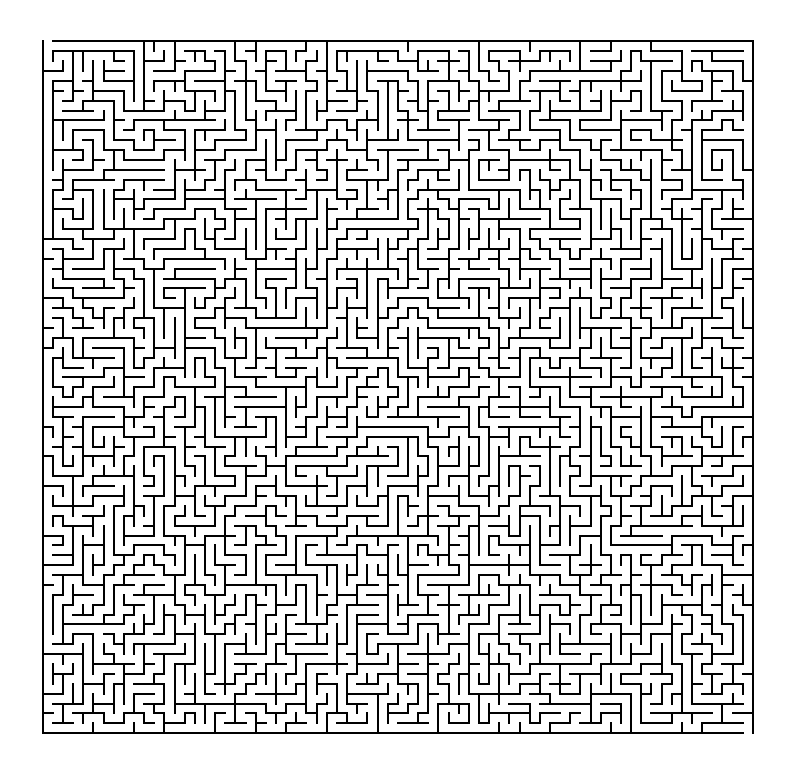

763

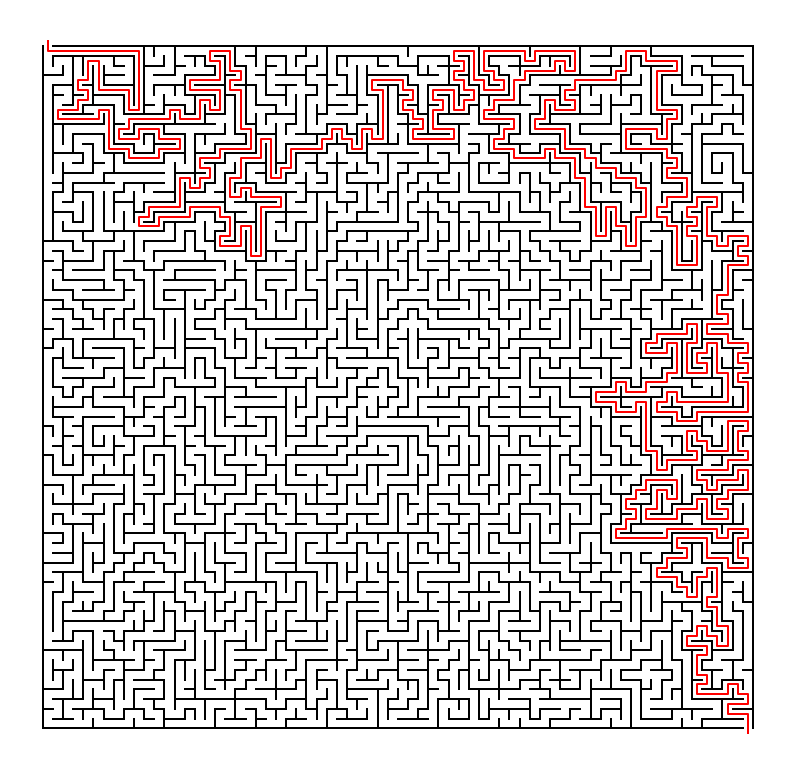

In [19]:
def show(pop):
    """ Uzywanie 'pop' parametru, zeby pokazac labirynt 70x70, najpierw bez sciezki rozwiazujacej, pozniej z rozwiazaniem """
    M = losowy_labirynt(70, 70, pop)
    draw_maze(M)
    plt.show()
    solution = BFS(M)
    draw_maze(M, path=[(0, -1)] + solution + [(M.width - 1, M.height)])
    return len(solution)

show(deque.pop)

# `pop=deque.popleft`

Ta strategia zdejmowania z kolejki z lewej strony tworzy labirynt przez
**Breadth-First** - startujemy w jakims kwadracie oznaczonym jako korzen,
dodajemy krawedz do niego, i stad zawsze wybieramy pierwsze krawedz rodzica
zanim wybierzemy krawedz dziecka.
Wynik sieci to design ktory wydaje sie miec efekt w koncentrycznych warstwach
z korzenia (ktory jest wybrany przez `random_tree` i nie jest koniecznie
gornym lewym kwadratem. Ponizej pojawia sie korzen w lewym prawym rogu.
`deque.popleft` labirynt jest interesujacy jako design, ale moze nie dzialac
jako pokazowy labirynt dla rozwiazywania. Jest zbyt latwy do przejscia.
(Podazaj za sciezka od startu do korzenia, wtedy rozwaz sciezke z konca do korzenia, i sprawdz jak sie dopasowuja ).



In [ ]:
show(deque.popleft)

# `pop=poprandom`

Mozemy losowo wybierac opcje dla parametru pop.
To interesujacy kompromis: labirynt ma odpowiednia strukture i wyglada
ladnie jako labirynt, ale pomimo tego sciezka nadal jest krotka jak w
`pop=popleft` - w ilosci zakretow efektywniejsze jest znaczaco
`pop=deque.pop` .


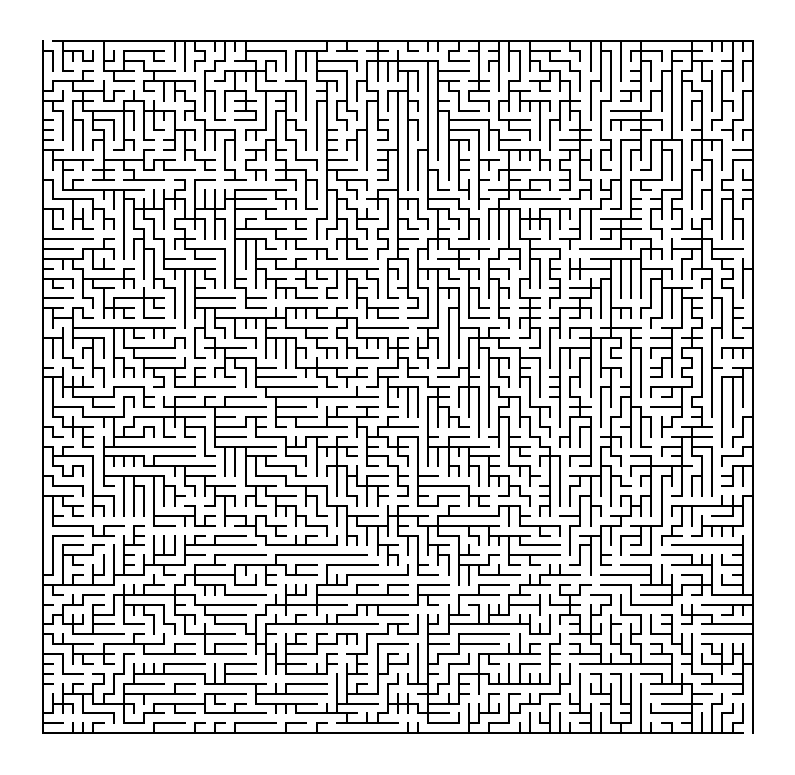

141

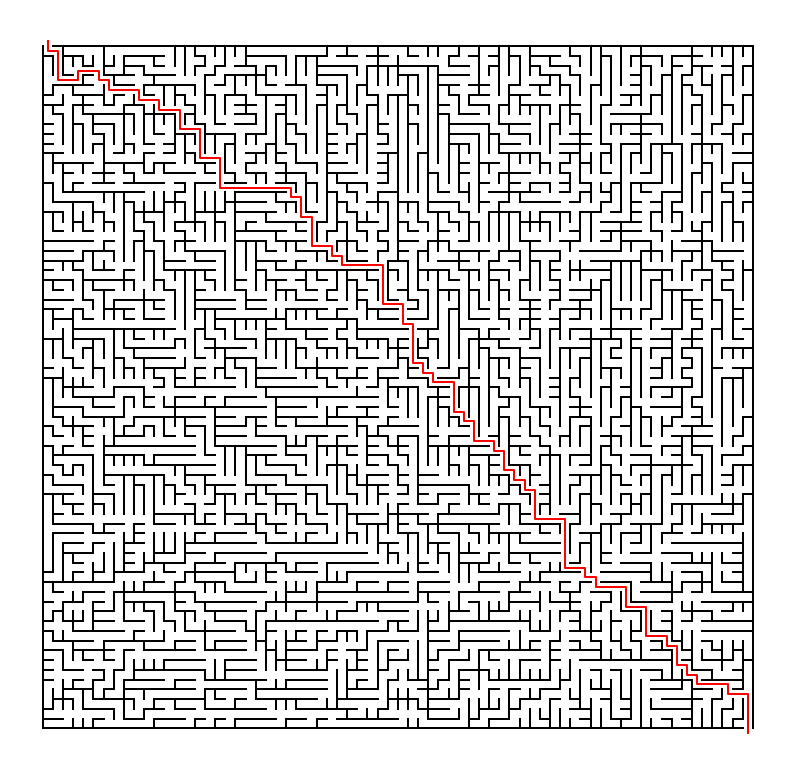

In [20]:
def poprandom(seq):
    """ Wybierz i zwroc losowy element, usun go z ciagu """
    element = random.choice(seq)
    seq.remove(element)
    return element

show(poprandom)